# Visualize the ADCP data

Load the packages:

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime 
import cmocean
import pandas as pd
%matplotlib widget

Specify the path to the data file to read:

In [37]:
#filename="../data/Level1/test/RDI300/L1_20230809_091533.nc"
#filename="C:/Users/tdoda/L2_20241009_134631.nc" # RDI600
filename="C:/Users/tdoda/L2_20241009_134524.nc" # RDI300
smoothing=False 
savefig=False

### Open the data files

In [39]:
D2=xr.open_dataset("C:/Users/tdoda/L2_20230809_091533.nc")

In [40]:
D = xr.open_dataset(filename)
D.close()
D

<xarray.Dataset>
Dimensions:    (time: 4146, depth: 85)
Coordinates:
  * time       (time) datetime64[ns] 2024-10-09T13:45:24 ... 2024-11-07T08:35:33
  * depth      (depth) float64 30.09 31.09 32.09 33.09 ... 112.1 113.1 114.1
Data variables: (12/28)
    u          (depth, time) float64 ...
    v          (depth, time) float64 ...
    w          (depth, time) float64 ...
    temp       (time) float64 ...
    vel_err    (depth, time) float64 ...
    echo1      (depth, time) float64 ...
    ...         ...
    u_qual     (depth, time) float64 ...
    v_qual     (depth, time) float64 ...
    w_qual     (depth, time) float64 ...
    mU         (time) float64 ...
    mdir       (time) float64 ...
    Sv         (depth, time) float64 ...
Attributes: (12/17)
    institution:       EPFL
    source:            ADCP
    references:        LéXPLORE commun instruments camille.minaudo@epfl.ch>
    history:           See history on Renku
    conventions:       CF 1.7
    comment:           Data from ADCP on Lexplore Platform in Lake Geneva
    ...                ...
    bottom_depth:      100
    transducer_depth:  27
    xmit_length:       0.93
    beam_angle:        20.0
    blank_dist:        2.0
    beam_freq:         300.0

In [41]:
Dconc = xr.concat([D2, D], dim="time")

C:\Users\tdoda\AppData\Local\anaconda3\envs\datalakes\Lib\site-packages\xarray\core\concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [44]:
dateval=D.time.values.astype("datetime64[s]").astype(datetime)
tnumval=D.time.values.astype("datetime64[s]").astype(np.int64)
depthval=D.depth.values

### Plot the quality data (correlation, echo, percentages good)

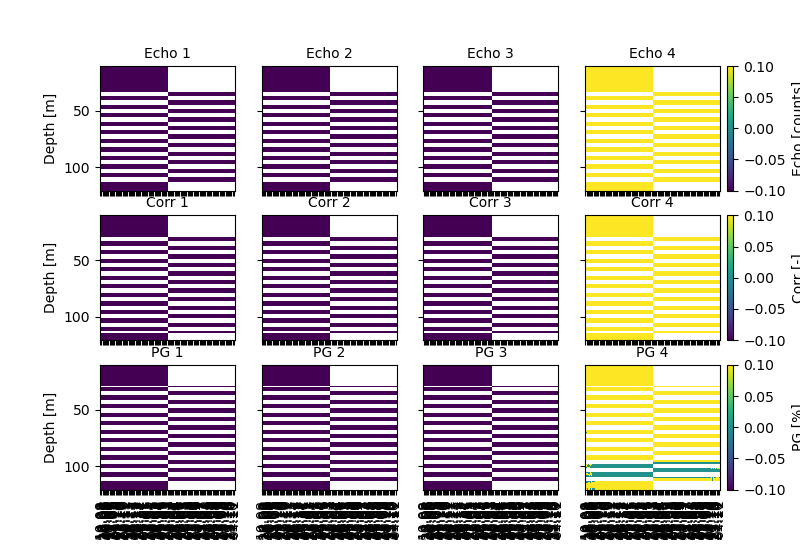

In [45]:
fig,ax=plt.subplots(3,4,figsize=(8,5.5),sharex=True,sharey=True)
cbwidth=0.05 # Width of the colorbar wth respect to the axis
dt=4 # Time step of the x axis [days]
title_size=10
minecho=np.min(np.array([D.echo1.values,D.echo2.values,D.echo3.values,D.echo4.values]))
maxecho=np.max(np.array([D.echo1.values,D.echo2.values,D.echo3.values,D.echo4.values]))
mincorr=np.min(np.array([D.corr1.values,D.corr2.values,D.corr3.values,D.corr4.values]))
maxcorr=np.max(np.array([D.corr1.values,D.corr2.values,D.corr3.values,D.corr4.values]))
minPG=np.min(np.array([D.prcnt_gd1.values,D.prcnt_gd2.values,D.prcnt_gd3.values,D.prcnt_gd4.values]))
maxPG=np.max(np.array([D.prcnt_gd1.values,D.prcnt_gd2.values,D.prcnt_gd3.values,D.prcnt_gd4.values]))

ax[0,0].pcolormesh(dateval,depthval,D.echo1.values,vmin=minecho,vmax=maxecho)
# ax[0,0].imshow(D.echo1.values, aspect='auto', cmap="viridis", origin='lower', extent=[dateval.min(), dateval.max(), depthval.min(), depthval.max()])
ax[0,0].set_title("Echo 1",fontsize=title_size)
ax[0,0].set_ylabel("Depth [m]")
ax[0,1].pcolormesh(dateval,depthval,D.echo2.values,vmin=minecho,vmax=maxecho)
ax[0,1].set_title("Echo 2",fontsize=title_size)
ax[0,2].pcolormesh(dateval,depthval,D.echo3.values,vmin=minecho,vmax=maxecho)
ax[0,2].set_title("Echo 3",fontsize=title_size)
pecho4=ax[0,3].pcolormesh(dateval,depthval,D.echo4.values,vmin=minecho,vmax=maxecho)
ax[0,3].set_title("Echo 4",fontsize=title_size)
bbox0=ax[0,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
cb1=fig.colorbar(pecho4,location="right",cax=cbaxes)
cb1.set_label("Echo [counts]",rotation=90)
#ax[0,3].set_position([bbox0.x0,bbox0.y0,bbox0.width,bbox0.height])


ax[1,0].pcolormesh(dateval,depthval,D.corr1.values,vmin=mincorr,vmax=maxcorr)
ax[1,0].set_title("Corr 1",fontsize=title_size)
ax[1,0].set_ylabel("Depth [m]")
ax[1,1].pcolormesh(dateval,depthval,D.corr2.values,vmin=mincorr,vmax=maxcorr)
ax[1,1].set_title("Corr 2",fontsize=title_size)
ax[1,2].pcolormesh(dateval,depthval,D.corr3.values,vmin=mincorr,vmax=maxcorr)
ax[1,2].set_title("Corr 3",fontsize=title_size)
pcorr4=ax[1,3].pcolormesh(dateval,depthval,D.corr4.values,vmin=mincorr,vmax=maxcorr)
ax[1,3].set_title("Corr 4",fontsize=title_size)
bbox0=ax[1,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
cb2=fig.colorbar(pcorr4,location="right",cax=cbaxes)
cb2.set_label("Corr [-]",rotation=90)

ax[2,0].pcolormesh(dateval,depthval,D.prcnt_gd1.values,vmin=minPG,vmax=maxPG)
ax[2,0].set_title("PG 1",fontsize=title_size)
ax[2,0].set_ylabel("Depth [m]")
ax[2,1].pcolormesh(dateval,depthval,D.prcnt_gd2.values,vmin=minPG,vmax=maxPG)
ax[2,1].set_title("PG 2",fontsize=title_size)
ax[2,2].pcolormesh(dateval,depthval,D.prcnt_gd3.values,vmin=minPG,vmax=maxPG)
ax[2,2].set_title("PG 3",fontsize=title_size)
pPG4=ax[2,3].pcolormesh(dateval,depthval,D.prcnt_gd4.values,vmin=minPG,vmax=maxPG)
ax[2,3].set_title("PG 4",fontsize=title_size)
bbox0=ax[2,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
cb3=fig.colorbar(pPG4,location="right",cax=cbaxes)
cb3.set_label("PG [%]",rotation=90)

ax[0,0].invert_yaxis()
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax[0,0].xaxis.set_major_locator(mdates.DayLocator(interval=dt))
ax[2,0].tick_params(axis='x', labelrotation=90)
ax[2,1].tick_params(axis='x', labelrotation=90)
ax[2,2].tick_params(axis='x', labelrotation=90)
ax[2,3].tick_params(axis='x', labelrotation=90)


### Extract and plot the flag indices

In [30]:
flag_index=np.arange(0,9,1)
flag_index_matrix=np.zeros((D.u_qual.values.shape[0],D.u_qual.values.shape[1],len(flag_index)))
flagval=np.copy(D.u_qual.values)
for kflag in np.arange(flag_index[-1],flag_index[0]-1,-1):
    flagval_new=flagval-2**kflag
    flag_index_matrix[:,:,kflag]=(flagval_new>=0)
    flagval[flagval_new>=0]=flagval_new[flagval_new>=0]
noflag=D.u_qual.values==0

C:\Users\tdoda\AppData\Local\Temp\ipykernel_17592\2589627502.py:2: RuntimeWarning: divide by zero encountered in log2
  pqual=ax.pcolormesh(dateval,depthval,np.log2(D.u_qual.values))


Text(0, 0.5, 'Depth [m]')

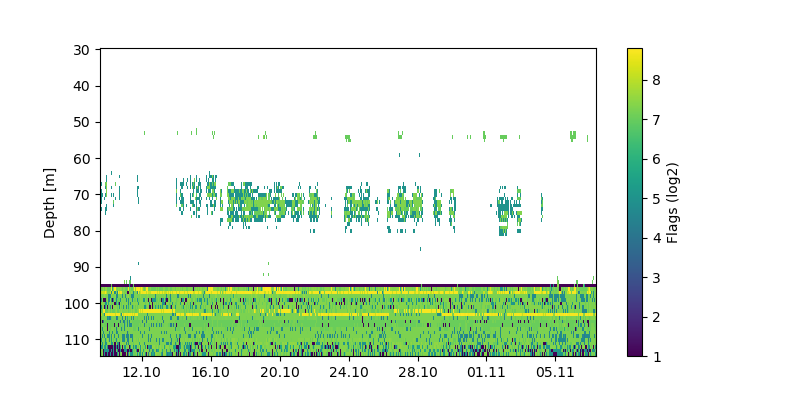

In [31]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
pqual=ax.pcolormesh(dateval,depthval,np.log2(D.u_qual.values))
cb1=fig.colorbar(pqual,location="right")
cb1.set_label("Flags (log2)",rotation=90)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=dt))
ax.set_ylabel("Depth [m]")
#ax.tick_params(axis='x', labelrotation=90)

In [32]:
# Save fig
if savefig:
    plt.savefig('L2_RDI300_qual.png',dpi=400)

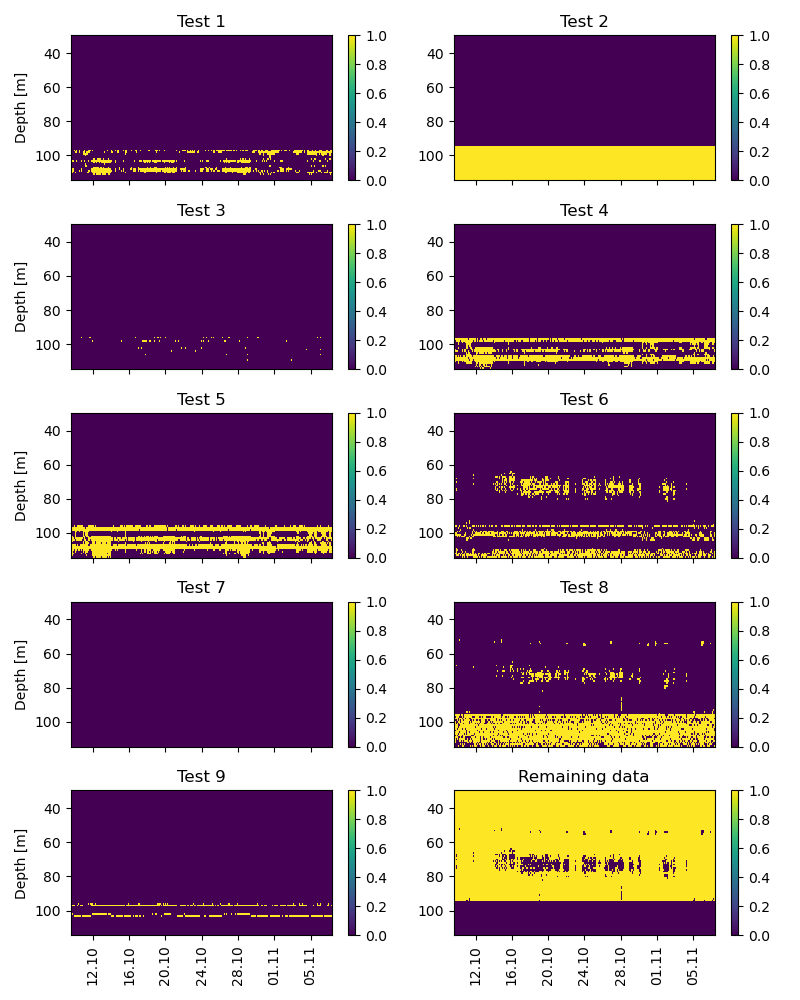

In [33]:
nrow=int(np.ceil((len(flag_index)+1)/2))
fig,ax=plt.subplots(nrow,2,figsize=(8,10),sharex=True,sharey=False)

for kval in range(len(flag_index)+1):
    if kval%2==0:
        icol=0
    else:
        icol=1
    irow=int(np.floor(kval/2))
    if kval<len(flag_index):
        pindex=ax[irow,icol].pcolormesh(dateval,depthval,flag_index_matrix[:,:,kval],vmin=0,vmax=1)
    else:
        pindex=ax[irow,icol].pcolormesh(dateval,depthval,noflag,vmin=0,vmax=1)
    cb1=fig.colorbar(pindex,location="right")
    ax[irow,icol].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax[irow,icol].xaxis.set_major_locator(mdates.DayLocator(interval=dt))
    if icol==0:
        ax[irow,icol].set_ylabel("Depth [m]")
    if kval<len(flag_index):  
        ax[irow,icol].set_title("Test {}".format(kval+1))
    else:
        ax[irow,icol].set_title("Remaining data")
    ax[irow,icol].invert_yaxis()
    ax[irow,icol].tick_params(axis='x', labelrotation=90)
fig.set_tight_layout(True)


In [34]:
# Save fig
if savefig:
    plt.savefig('L2_RDI300_flag_indices.png',dpi=400)

### Plot the velocity data 

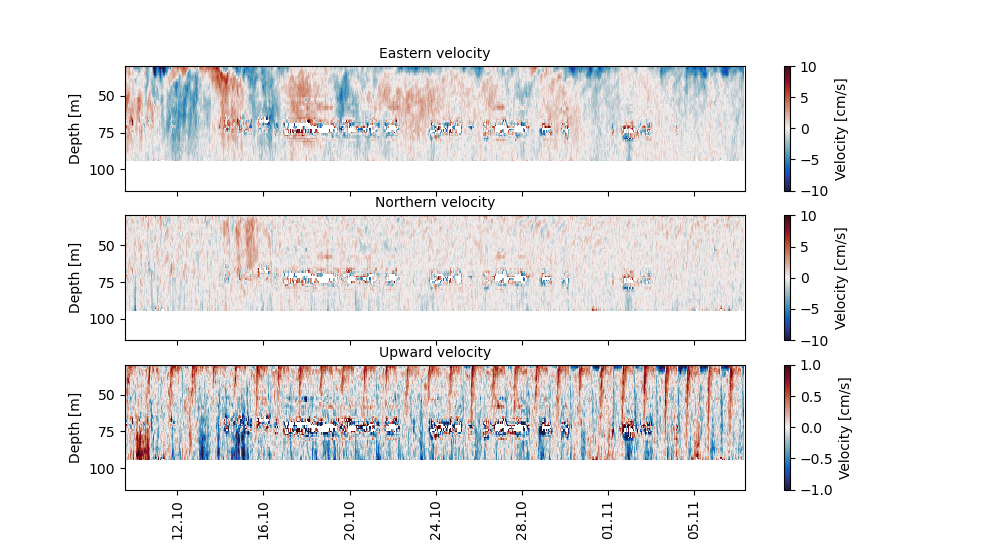

In [35]:
fig,ax=plt.subplots(3,1,figsize=(10,5.5),sharex=True,sharey=True)
cbwidth=0.05 # Width of the colorbar wth respect to the axis
dt=4 # Time step of the x axis [days]
title_size=10
horvel_lim=[-10,10]
vertvel_lim=[-1,1]
Uval=D.u.values*100
if smoothing:
    Usmooth=pd.DataFrame(Uval).T.rolling(window=5).mean().T
    Usmooth=pd.DataFrame(Usmooth).rolling(window=5).mean()
else:
    Usmooth=Uval
pVE=ax[0].pcolormesh(dateval,depthval,Usmooth,vmin=horvel_lim[0],vmax=horvel_lim[1],cmap=cmocean.cm.balance)
ax[0].set_title("Eastern velocity",fontsize=title_size)
ax[0].set_ylabel("Depth [m]")
cb1=fig.colorbar(pVE,location="right")
cb1.set_label("Velocity [cm/s]",rotation=90)

Vval=D.v.values*100
if smoothing:
    Vsmooth=pd.DataFrame(Vval).T.rolling(window=5).mean().T
    Vsmooth=pd.DataFrame(Vsmooth).rolling(window=5).mean()
else:
    Vsmooth=Vval
pVN=ax[1].pcolormesh(dateval,depthval,Vsmooth,vmin=horvel_lim[0],vmax=horvel_lim[1],cmap=cmocean.cm.balance)
ax[1].set_title("Northern velocity",fontsize=title_size)
ax[1].set_ylabel("Depth [m]")
cb2=fig.colorbar(pVN,location="right")
cb2.set_label("Velocity [cm/s]",rotation=90)

Wval=D.w.values*100
if smoothing:
    Wsmooth=pd.DataFrame(Wval).T.rolling(window=5).mean().T
    Wsmooth=pd.DataFrame(Wsmooth).rolling(window=5).mean()
else:
    Wsmooth=Wval
pVU=ax[2].pcolormesh(dateval,depthval,Wsmooth,vmin=vertvel_lim[0],vmax=vertvel_lim[1],cmap=cmocean.cm.balance)
ax[2].set_title("Upward velocity",fontsize=title_size)
ax[2].set_ylabel("Depth [m]")
cb3=fig.colorbar(pVU,location="right")
cb3.set_label("Velocity [cm/s]",rotation=90)

ax[0].invert_yaxis()
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=dt))
ax[2].tick_params(axis='x', labelrotation=90)



In [36]:
# Save fig
if savefig:
    plt.savefig('L1_RDI300.png',dpi=400)